# Airbnb Open Data

This data was obtained through Kaggle public platform, wich is available at:
https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

According to the owner, the data refers to Airbnb rentals in New York.
We will clean and analyse this dataset to obtain further insights.

The original content is available at:
http://insideairbnb.com/explore/

In [1]:
# Uploading and checking file structure

import pandas as pd

airbnb = pd.read_csv("Airbnb_Open_Data.csv")
airbnb.info()

C:\Users\tiago\AppData\Local\Temp\ipykernel_14432\2234004630.py:5: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv("Airbnb_Open_Data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [2]:
airbnb.sample(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
76214,43094328,1 Bedroom in a shared space with AC & garden.,54482695764,verified,Maria,Brooklyn,Bushwick,40.68342,-73.90993,United States,...,$141,1.0,19.0,6/30/2019,0.58,4.0,1.0,88.0,Party hard just don't break things.,NaN
87233,49180122,East Village Manhattan NYC Sofas!,30299347664,verified,Chris,Manhattan,East Village,40.72376,-73.98303,United States,...,$221,3.0,10.0,5/19/2019,0.27,3.0,3.0,0.0,"In the building you are my guest, know my name...",NaN
9644,6327717,Spacious NOMAD 1 BR for 4,95804428375,verified,Alexander,Manhattan,Midtown,40.74603,-73.98364,United States,...,$146,3.0,1.0,8/7/2015,0.02,5.0,1.0,263.0,Please remember that this is a residential bui...,NaN
18327,11123338,ENTIRE FLOR :) PRIVATE entrance&full bathroom!...,6622222503,unconfirmed,Jasmin,Brooklyn,Bushwick,40.69903,-73.93021,United States,...,$140,1.0,188.0,6/20/2019,5.30,5.0,5.0,270.0,No pets allowed. No smoking inside the house. ...,NaN
24606,14591230,Lower East Side - Bare Bones,70923260838,verified,Daniel,Manhattan,Lower East Side,40.72276,-73.98860,United States,...,$108,1.0,8.0,7/28/2017,0.33,1.0,1.0,0.0,NaN,NaN


In [3]:
airbnb.isnull().sum().sort_values(ascending=False)

license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
id                                     0
host id         

In [4]:
airbnb.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


### Data Cleaning

In [5]:
# Converting column names to snake_case:

airbnb.columns=[col.lower().replace(" ","_") for col in airbnb.columns]
airbnb.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [6]:
# We are analysing data from NY city, therefore the "country" and "country_code" columns will be discarded

airbnb.drop(["country","country_code"], axis = 1, inplace=True)

# Filling the null values in the "house_rules" with "not specifyed"

airbnb["house_rules"].fillna("not specifyed", inplace=True)

# Filling the null values in the "minimum nights" column as "0"

airbnb["minimum_nights"].fillna(0, inplace=True)

# Pandas recognized the "price" and "service fee" as objects, whereas they should be considered floats
# We have to remove str simbols ("$" and ",") and convert their file type to float

airbnb[["price", "service_fee"]] = airbnb[["price", "service_fee"]].replace('[\$,]', '', regex=True).astype(float)

# The minimum nights cannot be a negative number, we will replace all negatives for 0
# Also, minimum nights greater than 90 will be set to 90, as long term rentals

airbnb[airbnb["minimum_nights"] < 0] = 0
airbnb[airbnb["minimum_nights"] > 90] = 90


airbnb.sample(5)

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
6804,4759185,Private room on Upper East Side,48675696923,unconfirmed,Forest,Manhattan,Upper East Side,40.78343,-73.94764,False,...,14.0,1.0,51.0,6/11/2019,0.93,1.0,2.0,267.0,not specifyed,NaN
43874,25232946,Entire Studio Apartment Over Looking Central Park,95659626131,verified,Ana,Manhattan,East Harlem,40.79551,-73.94813,False,...,96.0,7.0,2.0,5/22/2019,0.95,5.0,1.0,173.0,Please remember that this is a residential bui...,NaN
72979,41307638,"1BR available in Bedstuy, Brooklyn!",89167628791,verified,Eric,Brooklyn,Bedford-Stuyvesant,40.69333,-73.94184,False,...,204.0,1.0,0.0,NaN,NaN,3.0,1.0,0.0,not specifyed,NaN
9354,6167550,Warehouse loft apartment,26868513856,verified,David,Brooklyn,Bedford-Stuyvesant,40.67939,-73.94939,False,...,64.0,2.0,174.0,6/12/2019,3.58,1.0,1.0,312.0,not specifyed,NaN
14748,9146656,3 bedroom near Park,42101637744,verified,Jackie,Queens,Jamaica Estates,40.72191,-73.78207,False,...,224.0,1.0,0.0,NaN,NaN,2.0,2.0,86.0,NO Smoking.,NaN


Analysing the dataset it's possible to notice that the only column containing any date/time information is the "last_review" column.

Thus, the analysis will be centered in this specific information. Any rows with null values in this column will be discarded, since it's not possible to evaluate their their information in a time frame (the data has a time gap between 2012 and 2058, as will be demonstrated further ahead).

According to the dataset information, previously displayed, there are 15893 null values in the "last_review" column, representing 15,5% of the dataset. 

In [7]:
# Converting the "last_review" column to the datetime format

airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])

# Checking the min and max timestamps

airbnb['last_review'].min(), airbnb['last_review'].max()

(Timestamp('1970-01-01 00:00:00'), Timestamp('2058-06-16 00:00:00'))

In [8]:
# Dropping all the row with null values in the "last_review" column

airbnb.dropna(subset="last_review", inplace=True)
airbnb["last_review"].isnull().sum()

# If you don't want to discard the null values, you can fill them as the minimum date:
#      airbnb["minimum_nights"].fillna("012-07-11 00:00:00", inplace=True)

0

In [9]:
# Now lets check how many reviews from the future do we have:

airbnb[airbnb['last_review']>'2022-09-01 00:00:00']

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
127,1071478,Garden studio in the Upper East Sid,77172555024,unconfirmed,Miller,Manhattan,Upper East Side,40.77800,-73.94822,False,...,114.0,5.0,21.0,2024-08-15,0.19,4.0,NaN,395.0,"Dear Guests, Welcome to 62 Cornwall St! I hope...",NaN
191,1106825,LUX APT IN TIMES SQUARE NEW BUILDING,93725364475,unconfirmed,Aiden,Manhattan,Hell's Kitchen,40.76307,-73.99665,False,...,108.0,0.0,41.0,2025-06-26,0.38,2.0,1.0,NaN,"You will be sharing a bathroom, so you must be...",NaN
255,1142173,Beautiful Landmarked Duplex,87944779917,NaN,Baker,Brooklyn,Greenpoint,40.72945,-73.95511,True,...,168.0,3.0,124.0,2058-06-16,1.22,4.0,3.0,230.0,No rules per say. I just ask that you respect ...,NaN
318,1176967,NaN,70084472212,verified,Barnes,Brooklyn,Greenpoint,40.72488,-73.95018,True,...,184.0,2.0,1.0,2026-03-28,0.01,3.0,1.0,73.0,Check-In is 3pm. Check-Out is 12 Noon. In or...,NaN
483,1268097,Modern Space in Charming Pre-war,13746585241,verified,Adelaide,Manhattan,Harlem,40.82411,-73.94934,False,...,144.0,2.0,41.0,2040-06-16,0.43,3.0,2.0,47.0,not specifyed,NaN


In [10]:
# Since we only have 5 results we will discard them, as they will not interfere with our analysis

airbnb = airbnb[airbnb['last_review']<'2022-09-01 00:00:00'] # Changed ">" for "<"
airbnb

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,not specifyed,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,True,...,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102588,6089124,"Loft Space for Events, Meetings & Shoots",85557432222,unconfirmed,Kalin,Manhattan,Flatiron District,40.74068,-73.98999,True,...,124.0,1.0,177.0,2019-06-29,3.78,4.0,1.0,410.0,Keep the apartment clean and damage free please.,NaN
102591,6090781,Columbus Ave Apt 1 block from Park,50908010324,verified,Lawrence,Manhattan,Upper West Side,40.77408,-73.98181,False,...,228.0,5.0,17.0,2019-01-04,0.35,5.0,1.0,134.0,#NAME?,NaN
102593,6091885,"Welcoming, Clean, Cheap on St Marks",33188605074,verified,Felipe,Manhattan,East Village,40.72826,-73.98422,True,...,220.0,1.0,8.0,2015-09-06,0.16,4.0,2.0,152.0,* No smoking indoors. * No pets * No loud/la...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,True,...,167.0,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN


In [11]:
# Now lets check the license column, since there is only two entrys there
# The code below gets the filled values in the "licence" column

airbnb[~airbnb['license'].isnull()]

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
62,90,90,90,90,90,90,90,90.0,90.0,90,...,90.0,90.0,90.0,1970-01-01 00:00:00.000000090,90.0,90.0,90.0,90.0,90,90
166,90,90,90,90,90,90,90,90.0,90.0,90,...,90.0,90.0,90.0,1970-01-01 00:00:00.000000090,90.0,90.0,90.0,90.0,90,90
167,90,90,90,90,90,90,90,90.0,90.0,90,...,90.0,90.0,90.0,1970-01-01 00:00:00.000000090,90.0,90.0,90.0,90.0,90,90
168,90,90,90,90,90,90,90,90.0,90.0,90,...,90.0,90.0,90.0,1970-01-01 00:00:00.000000090,90.0,90.0,90.0,90.0,90,90
169,90,90,90,90,90,90,90,90.0,90.0,90,...,90.0,90.0,90.0,1970-01-01 00:00:00.000000090,90.0,90.0,90.0,90.0,90,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101796,90,90,90,90,90,90,90,90.0,90.0,90,...,90.0,90.0,90.0,1970-01-01 00:00:00.000000090,90.0,90.0,90.0,90.0,90,90
101842,90,90,90,90,90,90,90,90.0,90.0,90,...,90.0,90.0,90.0,1970-01-01 00:00:00.000000090,90.0,90.0,90.0,90.0,90,90
101980,90,90,90,90,90,90,90,90.0,90.0,90,...,90.0,90.0,90.0,1970-01-01 00:00:00.000000090,90.0,90.0,90.0,90.0,90,90
102468,90,90,90,90,90,90,90,90.0,90.0,90,...,90.0,90.0,90.0,1970-01-01 00:00:00.000000090,90.0,90.0,90.0,90.0,90,90


In [12]:
# There seems to be duplicated values in the dataset,
# We can consider that Christina has two different apartments for rental
# But since both apartments have different host_id's, we can conclude the data is actually duplicated
# We will check for more duplicates in the code
# But first, lets not forget to drop the license column:

airbnb.drop(["license"], axis = 1, inplace=True)

# Also, the "id" and "host_id" columns do not provide any useful insights to the analysis, therefore they will be discarded

airbnb.drop(["id","host_id"], axis = 1, inplace=True)

In [13]:
# Now, lets create a subset to check for duplicates,
# We will be centering our analysis in the "last_review" column

airbnb[airbnb.duplicated(subset=["last_review", "name", "long", "lat", "price"])].sort_values("number_of_reviews",ascending=False)

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
70208,Great Bedroom in Manhattan,verified,Jj,Manhattan,Harlem,40.82085,-73.94025,False,strict,Private room,...,394.0,79.0,1.0,607.0,2019-06-21,7.75,2.0,3.0,293.0,not specifyed
70207,Beautiful Bedroom in Manhattan,verified,Jj,Manhattan,Harlem,40.82124,-73.93838,True,flexible,Private room,...,208.0,42.0,1.0,597.0,2019-06-23,7.72,1.0,3.0,342.0,not specifyed
70192,Private Bedroom in Manhattan,verified,Jj,Manhattan,Harlem,40.82264,-73.94041,True,strict,Private room,...,502.0,100.0,1.0,594.0,2019-06-15,7.57,3.0,3.0,339.0,not specifyed
72457,Steps away from Laguardia airport,verified,Maya,Queens,East Elmhurst,40.77006,-73.87683,True,moderate,Private room,...,464.0,93.0,1.0,543.0,2019-07-01,11.59,1.0,5.0,163.0,not specifyed
70056,Manhattan Lux Loft.Like.Love.Lots.Look !,verified,Carol,Manhattan,Lower East Side,40.71921,-73.99116,False,flexible,Private room,...,603.0,121.0,2.0,540.0,2019-07-06,6.95,1.0,1.0,179.0,not specifyed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91027,"Large, Sunny Studio in the heart of Chelsea.",unconfirmed,Eunice,Manhattan,Chelsea,40.74089,-74.00002,False,strict,Entire home/apt,...,695.0,139.0,2.0,NaN,2019-01-01,0.13,1.0,1.0,0.0,not specifyed
91831,Upper East Side Cozy Apartment,unconfirmed,Vladimir,Manhattan,Upper East Side,40.76830,-73.95919,False,moderate,Entire home/apt,...,151.0,30.0,4.0,NaN,2019-06-25,1.33,1.0,1.0,4.0,1. No parties. 2. Respect the neighbors. Nois...
99736,Bright and Charming Private Room in Williamburg!,unconfirmed,Naveen,Brooklyn,Williamsburg,40.71365,-73.96232,True,flexible,Private room,...,546.0,109.0,3.0,NaN,2018-10-10,0.38,1.0,1.0,188.0,"- cleaning, quiet, friendly, no drug, no smoking,"
100590,Room at Home in Lower East Side,unconfirmed,Andrea,Manhattan,Lower East Side,40.71833,-73.98556,True,strict,Private room,...,671.0,134.0,4.0,NaN,2019-06-25,0.63,4.0,2.0,244.0,I spent a lot of time and effort renovating my...


We found out there are many names for the same apartment! Also, the same apartment received tons of reviews under two different names in a time frame of two days, wich is clearly impossible. Thus, we can safely assume that we must not sum the number of reviews, but instead remove the duplicated values from the list.

Also, apparently 32.5% of or database seems to be duplicated.

In [14]:
# The drop_duplicates usually keeps the first value it founds, then drop the rest
# We want to keep the higest "number_of_reviews" in the dataset, 
# therefore we will reorganize its structure using sort_values

airbnb.sort_values("number_of_reviews", ascending=False, inplace=True)

# Now we will drop the duplicates, keeping the first items (higest number of reviews) in the dataset 

airbnb.drop_duplicates(subset=["last_review", "name", "long", "lat", "price"], inplace=True)

In [15]:
# Here is our final cleaned dataset!
airbnb

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
52488,Sonder Battery Park | Studio Apartment,verified,Sonder (NYC),Manhattan,Financial District,40.70617,-74.01486,False,strict,Entire home/apt,...,121.0,24.0,2.0,1024.0,2022-02-21,57.31,4.0,54.0,365.0,not specifyed
62244,City King,verified,Arlo SoHo,Manhattan,SoHo,40.72440,-74.00794,False,moderate,Hotel room,...,1097.0,219.0,1.0,1010.0,2021-11-22,33.08,4.0,11.0,80.0,not specifyed
49799,Amazing Micro Unit W/ communal rooftop and kit...,verified,The Ridge,Manhattan,East Village,40.72380,-73.99038,True,strict,Private room,...,123.0,25.0,1.0,966.0,2022-03-02,34.46,2.0,4.0,355.0,not specifyed
53078,Enjoy great views of the City!,unconfirmed,Row NYC,Manhattan,Theater District,40.75876,-73.98846,False,flexible,Hotel room,...,486.0,97.0,1.0,884.0,2022-02-19,25.23,3.0,9.0,360.0,not specifyed
49653,Come catch a Broadway Show & stay in Times Square,verified,M,Manhattan,Theater District,40.76360,-73.98473,False,flexible,Private room,...,89.0,18.0,1.0,849.0,2022-03-03,90.00,4.0,12.0,361.0,not specifyed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,"ART LOFT/HOME: DINNERS, GATHERINGS, PHOTO",verified,Allan,Manhattan,NoHo,40.72560,-73.99487,True,moderate,Entire home/apt,...,776.0,155.0,1.0,NaN,2019-06-21,1.65,5.0,1.0,116.0,Please be respectul of other occupants of the ...
25519,Artistic Bedstuy Apartment,unconfirmed,Rachel,Brooklyn,Bedford-Stuyvesant,40.68653,-73.94380,True,moderate,Private room,...,381.0,76.0,4.0,NaN,2017-10-09,0.09,5.0,1.0,0.0,- Please clean after yourself. Do not leave di...
26144,Brand New Apt In A Beautiful Elevator Building,verified,Ramonex,Manhattan,Harlem,40.81643,-73.94042,True,moderate,Private room,...,746.0,149.0,3.0,NaN,2019-06-22,3.80,2.0,1.0,205.0,not specifyed
26646,Private Cozy Bedroom In Bed Stuy,verified,Elijah,Brooklyn,Bedford-Stuyvesant,40.68254,-73.94504,True,moderate,Private room,...,55.0,11.0,5.0,NaN,2018-08-13,0.29,2.0,1.0,0.0,not specifyed


### Data Visualization

In [16]:
# Importing essential libraries

import pandas as pd
pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

import seaborn as sns

# Most visited places 
# Top 20 neighbourhoods
# Top 10 names for housing (considering number of reviews and names)
#

In [17]:
airbnb["neighbourhood_group"].value_counts()
# Need to clean those smaller values!

Manhattan        24112
Brooklyn         23898
Queens            8038
Bronx             1671
Staten Island      575
manhatan             1
brookln              1
90                   1
0                    1
Name: neighbourhood_group, dtype: int64

In [18]:
airbnb.replace("manhatan", "Manhattan", inplace=True)
airbnb.replace("brookln", "Brooklyn", inplace=True)

# Now, lets limit the available values in the neighbourhood_group, as follows:
neighbourhood_group = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]
airbnb[~airbnb["neighbourhood_group"].isin(neighbourhood_group)] = None

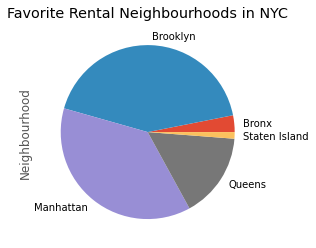

In [50]:
airbnb.groupby(airbnb["neighbourhood_group"])["number_of_reviews"].sum().plot.pie()
plt.title("Favorite Rental Neighbourhoods in NYC")
plt.ylabel("Neighbourhood")
plt.savefig("Pie Chart - Favorite Rental Neighbourhoods in NYC")

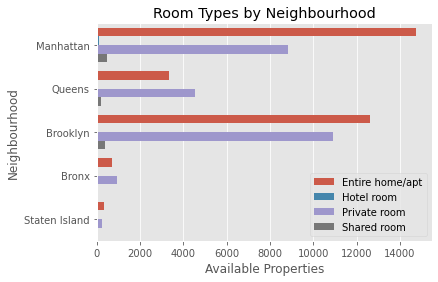

In [51]:
sns.countplot(data=airbnb, y=airbnb["neighbourhood_group"], hue='room_type');
plt.title("Room Types by Neighbourhood")
plt.ylabel("Neighbourhood")
plt.xlabel("Available Properties")
plt.legend(loc="lower right")

<AxesSubplot:xlabel='price', ylabel='Count'>

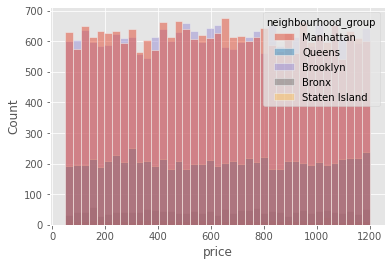

In [66]:
sns.histplot(data=airbnb, hue="neighbourhood_group", x="price")

<AxesSubplot:xlabel='reviews_per_month', ylabel='Count'>

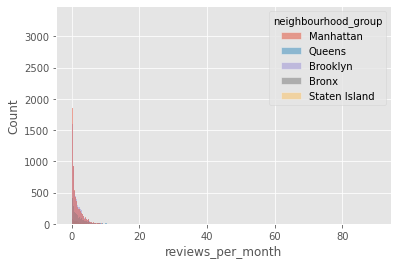

In [72]:
sns.histplot(data=airbnb, hue="neighbourhood_group", x="reviews_per_month")